In [11]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import time
import os, sys
import re
import glob
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import random
import PIL.Image as Image
from skimage import color
from skimage import io


## Input 
source_dir = '../thumbnails2'
filename = 'large_G1_15mgml_x'
ext = '.jpg'

wavelength_A = 0.770088 #16.1keV
pixel_size_um = 172.0
distance = 5.300
beam_position = [457.0, 569.0]
print(4*np.pi/wavelength_A*17.2e-3/5.3/2)

## Find matching files
pattern = filename+'*'
print(pattern)
infiles = glob.glob(os.path.join(source_dir, pattern))
infiles.sort()
print('Considering {} files...'.format(len(infiles)))



0.026478421403515386
large_G1_15mgml_x*
Considering 708 files...


../thumbnails2/large_G1_15mgml_x-0.000_y-6.592_3.00s_074616_SAXS.jpg


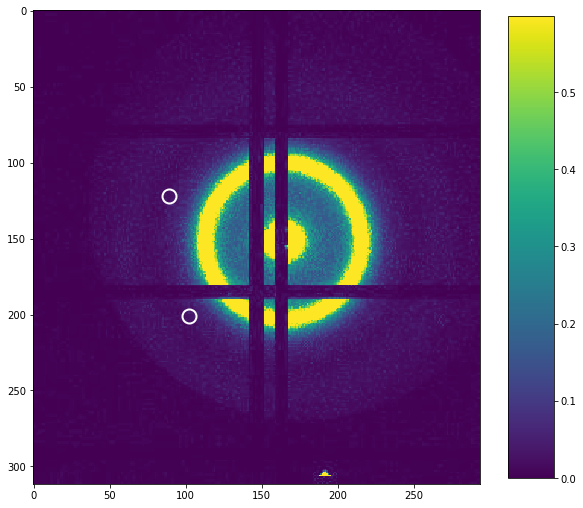

In [12]:
# Plot one image
infile = infiles[0]
print(infile)
im = color.rgb2gray(io.imread(infile))

%matplotlib inline
fig = plt.figure(1,figsize=[10,10])
plt.imshow(im, vmax = np.max(im)*0.6)
plt.colorbar(shrink=0.85, aspect=10)


# choose a pixel of interest
pixel = [89,122]
#plt.scatter(pixel[0],pixel[1],marker = 'o', c='w')
plt.plot( pixel[0],pixel[1], 'o', markersize=14, markeredgewidth=2,markeredgecolor='w', markerfacecolor='None')
 
pixel = [102,201]
plt.plot( pixel[0],pixel[1], 'o', markersize=14, markeredgewidth=2,markeredgecolor='w', markerfacecolor='None')
 
           
plt.show()



In [49]:
#parse_re = '^.+_x(-?\d+\.\d+)_y(-?\d+\.\d+)_.+_SAXS{}$'.format(ext)
parse_re = '^.+_x(-?\d+\.\d+)_y(-?\d+\.\d+)_.+_(\d+)_SAXS{}$'.format(ext)
match_re = re.compile(parse_re)


x_pos = []
y_pos = []
feature = []
for idx, infile in enumerate(infiles):
       
    filebase, filename = os.path.split(infile)
    m = match_re.match(filename)
    
    if m!=None:
        x = float(m.groups()[0]) 
        y = float(m.groups()[1])

        x_pos.append(x)
        y_pos.append(y)

        #im = Image.open(infile)
        im = color.rgb2gray(io.imread(infile))
        imarray = np.array(im)
        val = imarray[pixel[0],pixel[1]]

        feature.append(val)

print('done')

print(m.groups())
print(infile)


done
('2.800', '-7.495', '074822')
../thumbnails2/large_G1_15mgml_x2.800_y-7.495_5.00s_074822_SAXS.jpg


(-1.8202569892473117,
 2.1742569892473123,
 -7.453026600441501,
 -6.919973399558498)

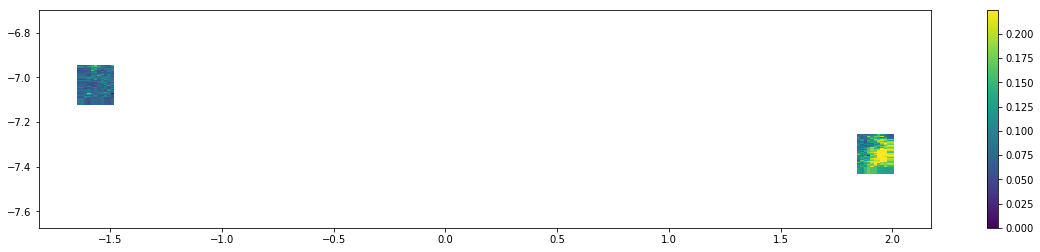

In [30]:
%matplotlib tk

val_max = np.max(feature)
val_mean = np.mean(feature)

fig = plt.figure(2, figsize=[20,4])
plt.scatter(x_pos,y_pos,c=feature, marker="s",vmin=0, vmax=(val_max+val_mean)/2.0)
plt.colorbar();
plt.axis('equal')

#plt.xlim(-4.1,4)
#plt.ylim(-8,-6.5)


In [7]:
val_mean

0.11752356862745097